In [1]:
library(Seurat)
library(dplyr)
library(tibble)
library(ComplexHeatmap)
library(circlize)
library(viridis)
library(ggplot2)
source("./heatmap.fun.R")
inputdir <- "./load_files/"
outputdir <- "./report/"

Registered S3 methods overwritten by 'tibble':
  method     from  
  format.tbl pillar
  print.tbl  pillar


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: grid

ComplexHeatmap version 2.2.0
Bioconductor page: http://bioconductor.org/packages/ComplexHeatmap/
Github page: https://github.com/jokergoo/ComplexHeatmap
Documentation: http://jokergoo.github.io/ComplexHeatmap-reference

If you use it in published research, please cite:
Gu, Z. Complex heatmaps reveal patterns and correlations in multidimensional 
  genomic data. Bioinformatics 2016.


circlize version 0.4.13
CRAN page: https://cran.r-project.org/package=circlize
Github page: https://github.com/jokergoo/circlize
Documentation: https://jokergoo.github.io/circlize_book/book/

If you use it in published research, please cite:
Gu, Z. circlize implements and

In [2]:
## Validate the data by showing some known markers
gp <- 'MGE-InN' #"CGE-InN"
res <- readRDS(file = paste0(inputdir, "DEG_res_", gp, "_v1.rds"))
allavg <- readRDS(file = paste0(inputdir, "Avg_res_", gp, "_v1.rds"))
colnames(allavg) <- gsub("\\|", paste0("|", gp, "|"), colnames(allavg))

sel_genes <- c("LHX6", "SOX6", "SST", "RELN", "CALB1", "TAC1", "VIP", "NR2F2", "PROX1", "NR2F1", "TAC3", "CALB2", 
           "ADARB2") %>%
            intersect(., rownames(allavg))

other_gp <- setdiff(c('MGE-InN', 'CGE-InN'), gp)
other_avg <- readRDS(file = paste0(inputdir, "Avg_res_", other_gp, "_v1.rds"))
colnames(other_avg) <- gsub("\\|", paste0("|", other_gp, "|"), colnames(other_avg))

cbn_avg <- cbind(allavg[sel_genes, ], other_avg[sel_genes, ]) %>%
            t() %>% scale() %>% t() %>%
            MinMax(., min = -1.5, max = 2)
dim(cbn_avg)

[1]  13 520

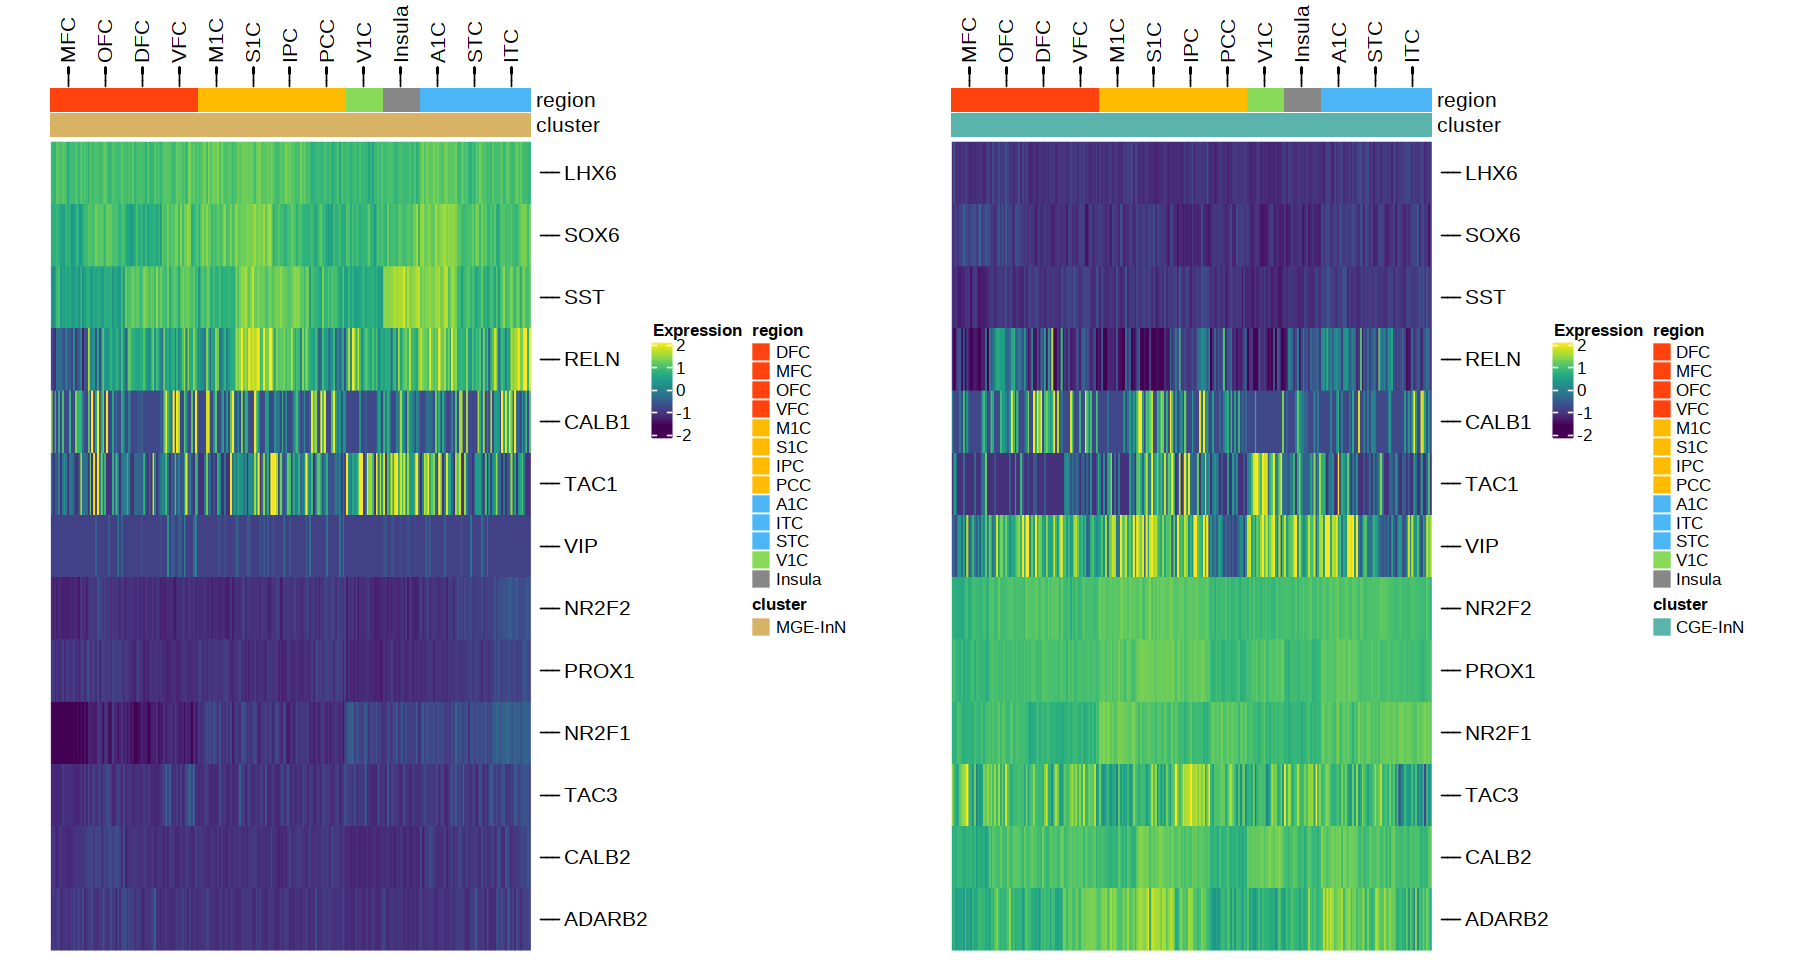

In [3]:
reg_ord <- c("MFC","OFC","DFC","VFC","M1C","S1C","IPC","PCC","V1C","Insula","A1C","STC","ITC")
ref1 <- plot_heatmap.end(mat = cbn_avg[, paste0(rep(reg_ord, each = 20), 
                                               paste0("|", gp, "|"), 
                                               rep(1:20, by = length(reg_ord)))], 
                         label_genes = sel_genes, 
                         color_breaks = seq(-1.5, 2, 0.25), 
                         module_labs = NULL, row_dend = FALSE)
ref2 <- plot_heatmap.end(mat = cbn_avg[, paste0(rep(reg_ord, each = 20), 
                                               paste0("|", other_gp, "|"), 
                                               rep(1:20, by = length(reg_ord)))], 
                         label_genes = sel_genes, 
                         color_breaks = seq(-1.5, 2, 0.25), 
                         module_labs = NULL, row_dend = FALSE)
options(repr.plot.width=15, repr.plot.height=8, res = 300)
pushViewport(viewport(layout = grid.layout(nr = 1, nc = 2)))

pushViewport(viewport(layout.pos.row = 1, layout.pos.col = 1))
draw(ref1, newpage =FALSE)
popViewport()

pushViewport(viewport(layout.pos.row = 1, layout.pos.col = 2))
draw(ref2, newpage =FALSE)
popViewport()

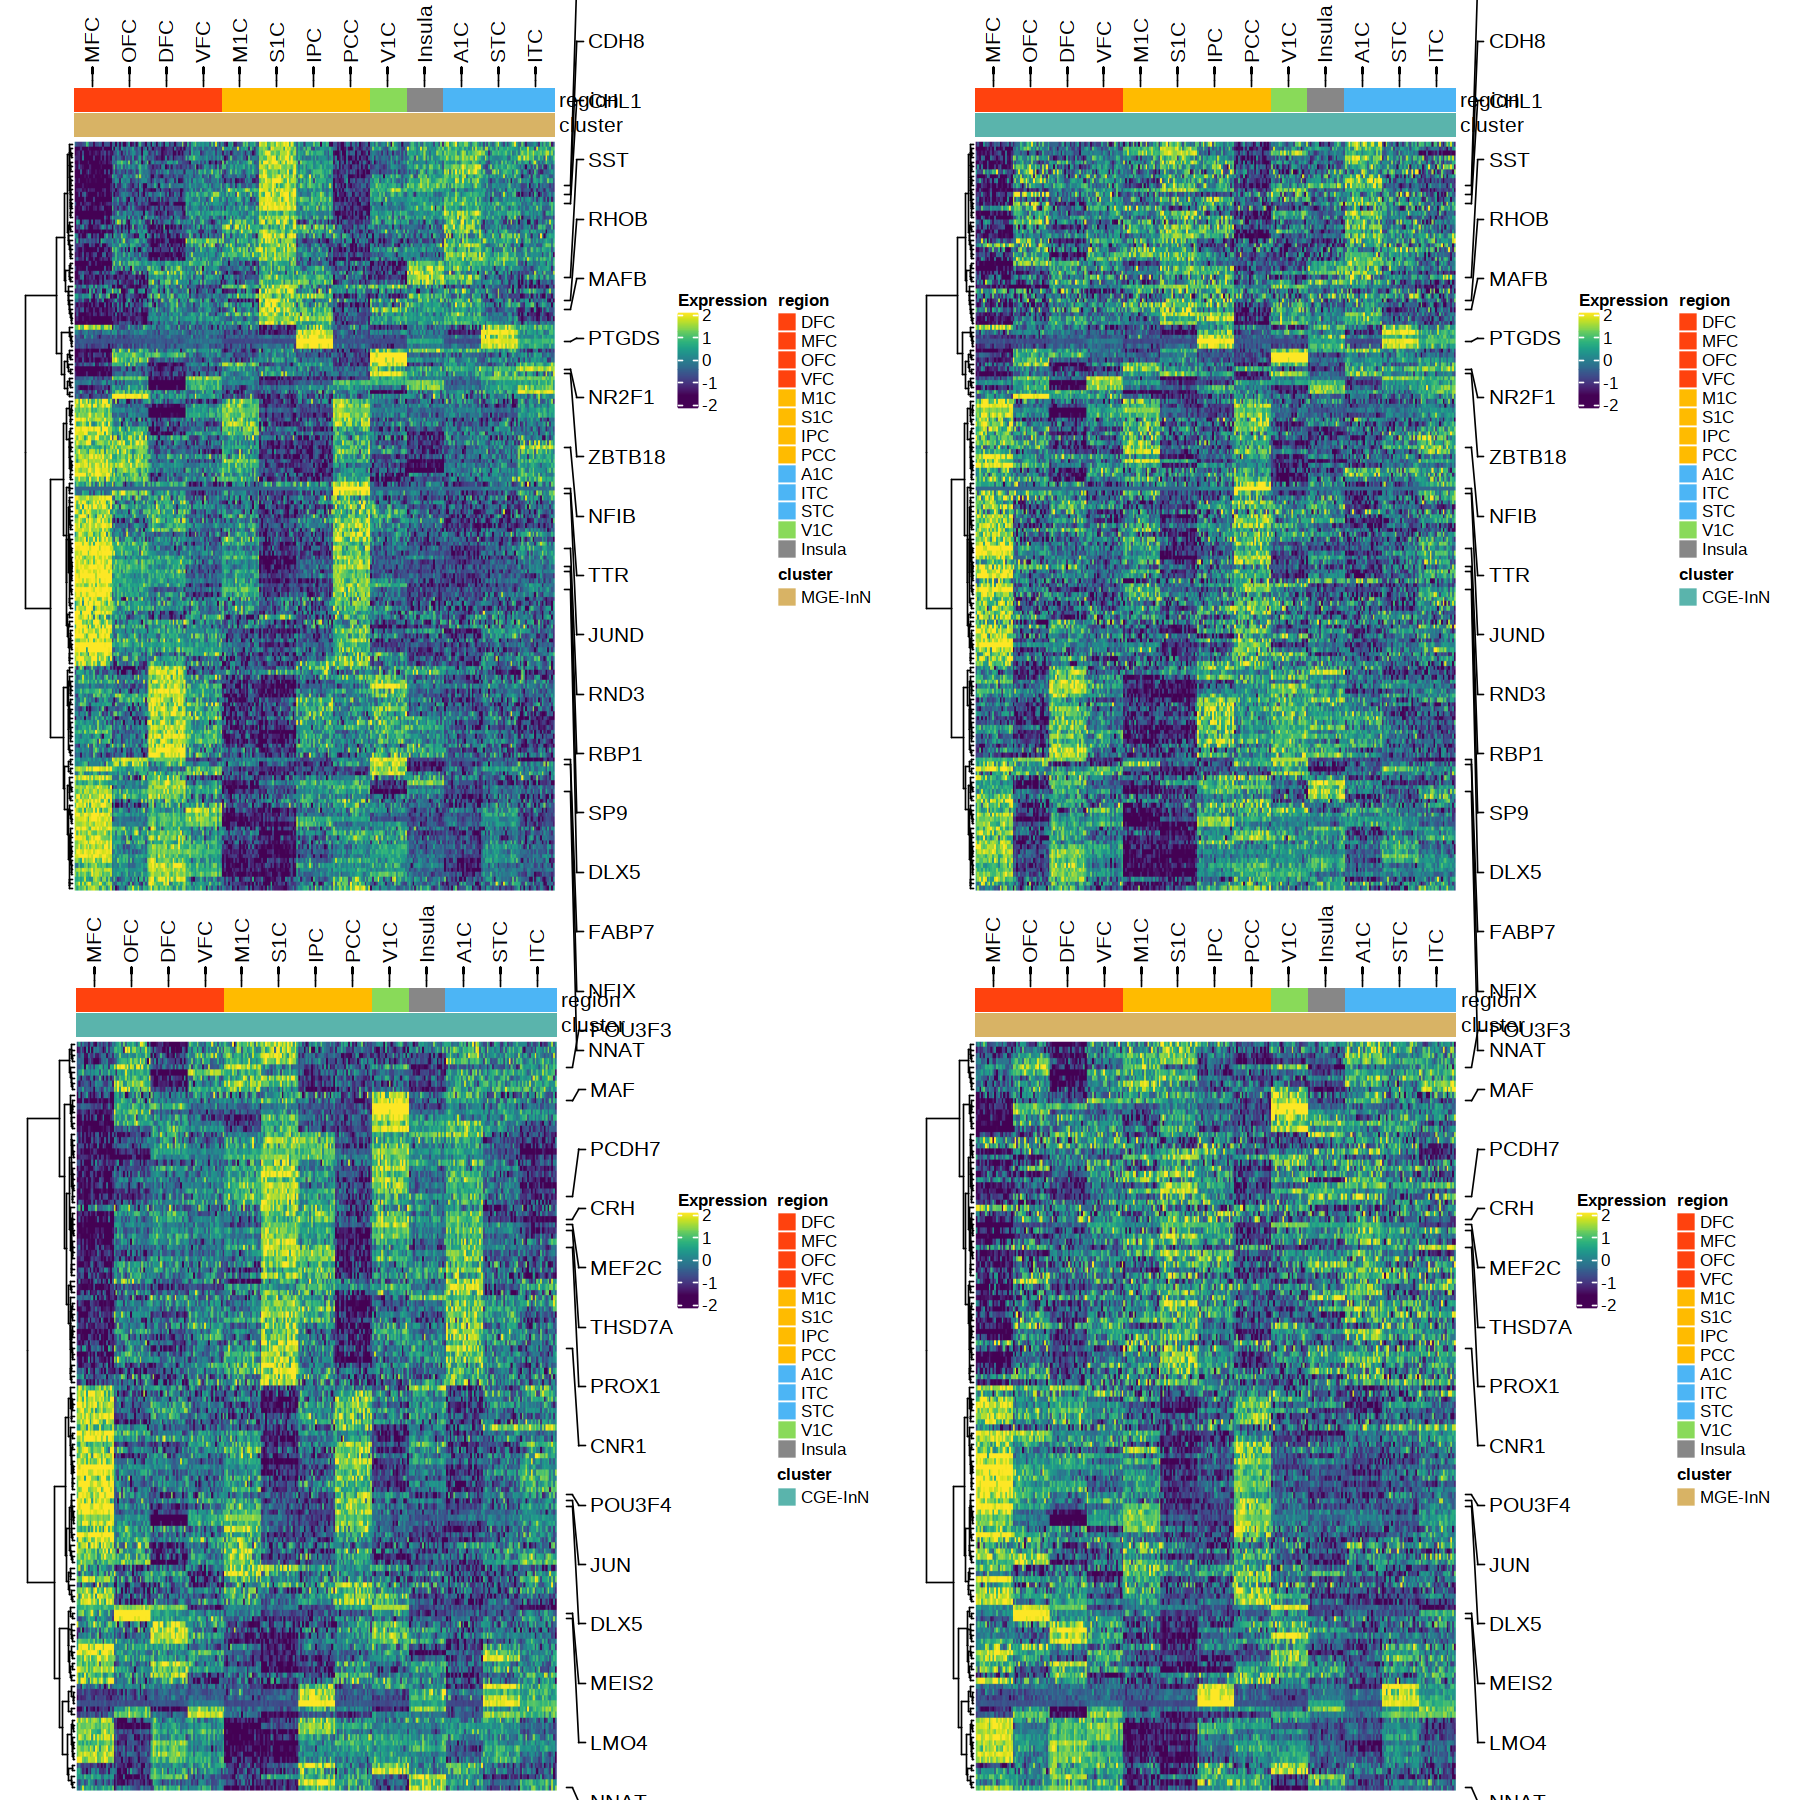

In [4]:
options(repr.plot.width=15, repr.plot.height=15, res = 300)
pushViewport(viewport(layout = grid.layout(nr = 2, nc = 2)))
for (ii in 1:length(c('MGE-InN', 'CGE-InN'))){
    gp <- c('MGE-InN', 'CGE-InN')[ii]
    res <- readRDS(file = paste0(inputdir, "DEG_res_", gp, "_v1.rds"))
    allavg <- readRDS(file = paste0(inputdir, "Avg_res_", gp, "_v1.rds"))
    scale_avg <- allavg[res$mars, ] %>%
                t() %>% scale() %>% t() %>%
                MinMax(., min = -1.5, max = 2)
    colnames(scale_avg) <- gsub("\\|", paste0("|", gp, "|"), colnames(scale_avg))



    reg_ord <- c("MFC","OFC","DFC","VFC","M1C","S1C","IPC","PCC","V1C","Insula","A1C","STC","ITC")
    vis_avg <- scale_avg[, paste0(rep(reg_ord, each = 20), paste0("|", gp, "|"), rep(1:20, by = length(reg_ord)))]
    hc <- hclust(as.dist(1 - cor(t(scale_avg), method = "p")), method = "ward.D2")
    gene_ord <- rownames(vis_avg)[hc$order]
    tfs <- read.csv(file = "~/project/public_data/MEME_db/custom_motif/DatabaseExtract_v_1.01.csv", 
                    stringsAsFactors = FALSE) %>%
            subset(Is.TF. == "Yes") %>%
            .$HGNC.symbol %>% 
            unique() %>%
            intersect(., gene_ord)
    sel_genes <- switch(gp,
        `MGE-InN` = c("ROBO", "RHOB", "GABBR2", "CDH8", "SST", "CHL1", "GABRB2", "NR2F1", 
                      "NFIB", "JUND", "RND3", "DLX5", "TTR", "SP9", "RBP1", "MEIS2", "NFIX",
                      "FABP7", "NNAT", "PTGDS", "MAFB", "ZBTB18", "SOX1"), 
        `CGE-InN` = c("PROX1", "THSD7A", "MAF", "CRH", "MEF2C", "PCDH7", "POU3F3", "CNR1", 
                      "ADARB2", "DLX5", "JUN", "ARX", "LMO4", "NNAT", "PEG3", "MEIS2", "ZBTB18", "POU3F4"))
    ht1 <- plot_heatmap.end(mat = vis_avg, 
                             label_genes = sel_genes, 
                             color_breaks = seq(-1.5, 2, 0.25), 
                             module_labs = NULL, row_dend = as.dendrogram(hc))
    pushViewport(viewport(layout.pos.row = ii, layout.pos.col = 1))
    draw(ht1, newpage =FALSE)
    popViewport()


    other_gp <- setdiff(c('MGE-InN', 'CGE-InN'), gp)
    other_avg <- readRDS(file = paste0(inputdir, "Avg_res_", other_gp, "_v1.rds")) %>%
                    .[rownames(vis_avg), ] %>%
                    t() %>% scale() %>% t() %>%
                    MinMax(., min = -1.5, max = 2)
    colnames(other_avg) <- gsub("\\|", paste0("|", other_gp, "|"), colnames(other_avg))
    other_avg <- other_avg[, paste0(rep(reg_ord, each = 20), 
                                    paste0("|", other_gp, "|"), 
                                    rep(1:20, by = length(reg_ord)))]
    ht2 <- plot_heatmap.end(mat = other_avg, 
                            label_genes = sel_genes, 
                            color_breaks = seq(-1.5, 2, 0.25), 
                            module_labs = NULL, row_dend = as.dendrogram(hc))

    pushViewport(viewport(layout.pos.row = ii, layout.pos.col = 2))
    draw(ht2, newpage =FALSE)
    popViewport()
    ## the pushViewport messed up the gene labels, has to save to pdf files
}

In [5]:
pdf(paste0("./report/", "Region_Enrich_correlation.MCGE.InN.heatmap.pdf"), width = 17, height = 12)
pushViewport(viewport(layout = grid.layout(nr = 2, nc = 2)))
for (ii in 1:length(c('MGE-InN', 'CGE-InN'))){
    gp <- c('MGE-InN', 'CGE-InN')[ii]
    res <- readRDS(file = paste0(inputdir, "DEG_res_", gp, "_v1.rds"))
    allavg <- readRDS(file = paste0(inputdir, "Avg_res_", gp, "_v1.rds"))
    scale_avg <- allavg[res$mars, ] %>%
                t() %>% scale() %>% t() %>%
                MinMax(., min = -1.5, max = 2)
    colnames(scale_avg) <- gsub("\\|", paste0("|", gp, "|"), colnames(scale_avg))



    reg_ord <- c("MFC","OFC","DFC","VFC","M1C","S1C","IPC","PCC","V1C","Insula","A1C","STC","ITC")
    vis_avg <- scale_avg[, paste0(rep(reg_ord, each = 20), paste0("|", gp, "|"), rep(1:20, by = length(reg_ord)))]
    hc <- hclust(as.dist(1 - cor(t(scale_avg), method = "p")), method = "ward.D2")
    gene_ord <- rownames(vis_avg)[hc$order]
    tfs <- read.csv(file = "~/project/public_data/MEME_db/custom_motif/DatabaseExtract_v_1.01.csv", 
                    stringsAsFactors = FALSE) %>%
            subset(Is.TF. == "Yes") %>%
            .$HGNC.symbol %>% 
            unique() %>%
            intersect(., gene_ord)
    sel_genes <- switch(gp,
        `MGE-InN` = c("ROBO", "RHOB", "GABBR2", "CDH8", "SST", "CHL1", "GABRB2", "NR2F1", 
                      "NFIB", "JUND", "RND3", "DLX5", "TTR", "SP9", "RBP1", "MEIS2", "NFIX",
                      "FABP7", "NNAT", "PTGDS", "MAFB", "ZBTB18", "SOX1"), 
        `CGE-InN` = c("PROX1", "THSD7A", "MAF", "CRH", "MEF2C", "PCDH7", "POU3F3", "CNR1", 
                      "ADARB2", "DLX5", "JUN", "ARX", "LMO4", "NNAT", "PEG3", "MEIS2", "ZBTB18", "POU3F4"))
    ht1 <- plot_heatmap.end(mat = vis_avg, 
                             label_genes = sel_genes, 
                             color_breaks = seq(-1.5, 2, 0.25), 
                             module_labs = NULL, row_dend = as.dendrogram(hc))
    pushViewport(viewport(layout.pos.row = ii, layout.pos.col = 1))
    draw(ht1, newpage =FALSE)
    popViewport()


    other_gp <- setdiff(c('MGE-InN', 'CGE-InN'), gp)
    other_avg <- readRDS(file = paste0(inputdir, "Avg_res_", other_gp, "_v1.rds")) %>%
                    .[rownames(vis_avg), ] %>%
                    t() %>% scale() %>% t() %>%
                    MinMax(., min = -1.5, max = 2)
    colnames(other_avg) <- gsub("\\|", paste0("|", other_gp, "|"), colnames(other_avg))
    other_avg <- other_avg[, paste0(rep(reg_ord, each = 20), 
                                    paste0("|", other_gp, "|"), 
                                    rep(1:20, by = length(reg_ord)))]
    ht2 <- plot_heatmap.end(mat = other_avg, 
                            label_genes = sel_genes, 
                            color_breaks = seq(-1.5, 2, 0.25), 
                            module_labs = NULL, row_dend = as.dendrogram(hc))

    pushViewport(viewport(layout.pos.row = ii, layout.pos.col = 2))
    draw(ht2, newpage =FALSE)
    popViewport()
}
dev.off()

png 
  2

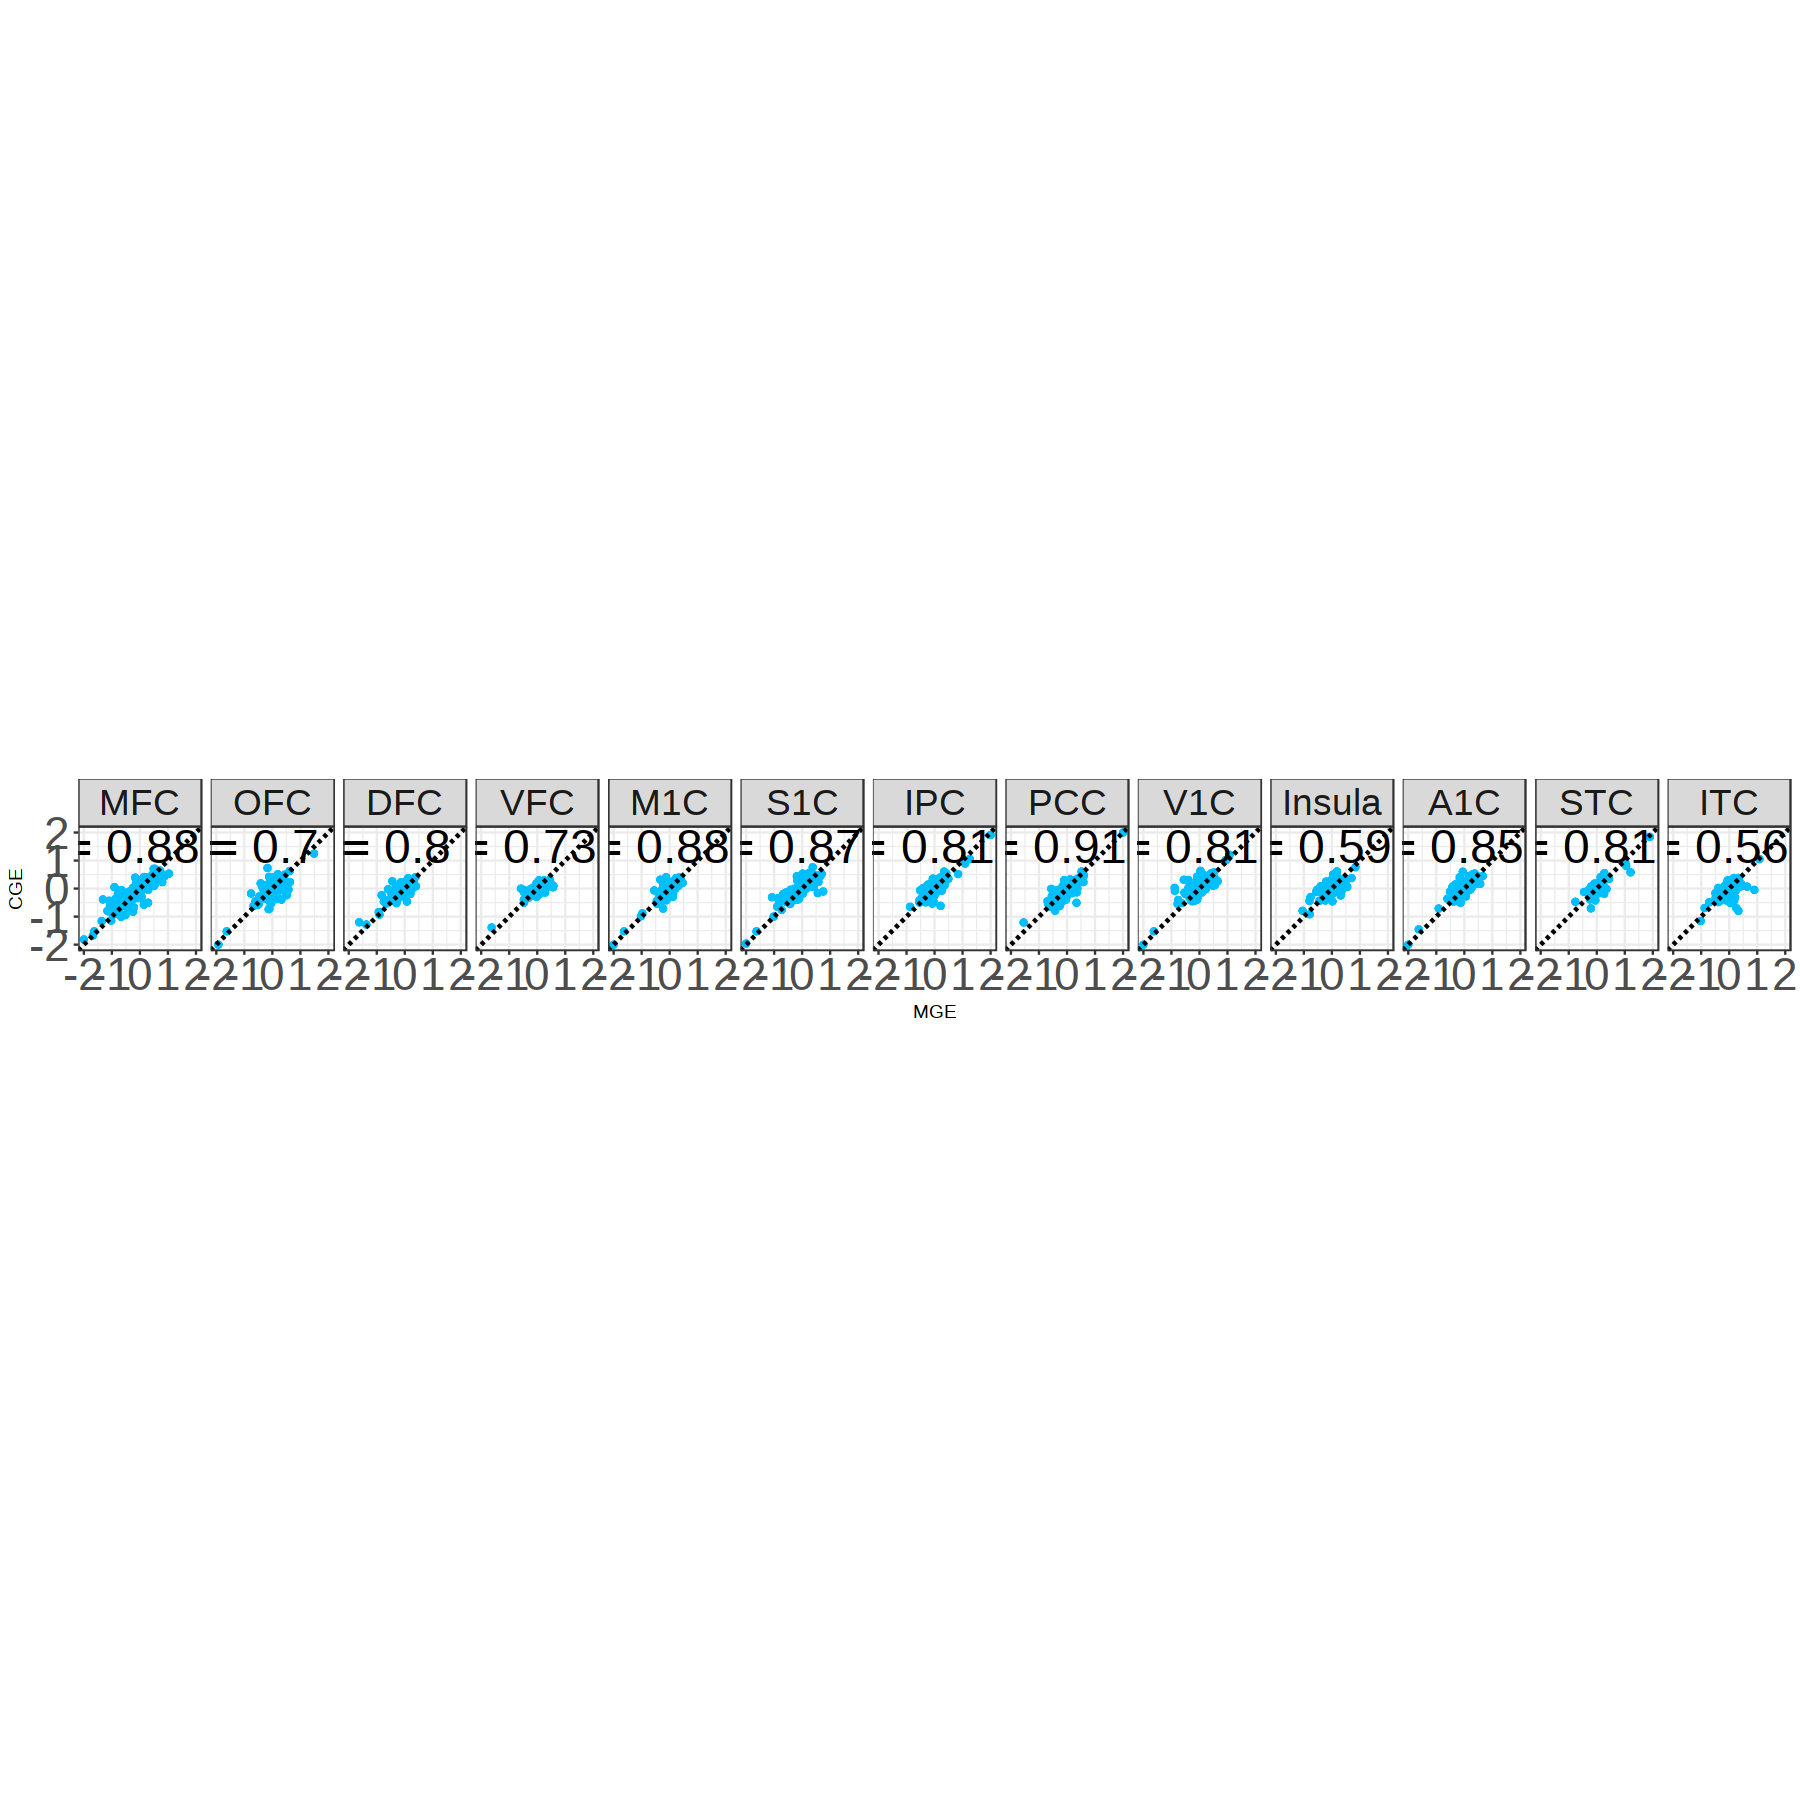

In [6]:
## Check correlaton of regional enrichment (measured by fold changes)
res_mge <- readRDS(file = paste0("./load_files/", "DEG_res_", "MGE-InN", "_v1.rds"))
res_cge <- readRDS(file = paste0("./load_files/", "DEG_res_", "CGE-InN", "_v1.rds"))

degs <- list(res_mge$mars, res_cge$mars) %>%
        unlist() %>%
        unique()

avg_mge <- res_mge$avg; colnames(avg_mge) <- paste0(colnames(avg_mge), "|", "MGE-InN")
avg_cge <- res_cge$avg; colnames(avg_cge) <- paste0(colnames(avg_cge), "|", "CGE-InN")
avgs <- cbind(avg_mge, avg_cge[rownames(avg_mge), ])
ptval <- 0.05
reg_ord <- c("MFC","OFC","DFC","VFC","M1C","S1C","IPC","PCC","V1C","Insula","A1C","STC","ITC")
fc_list <- lapply(c("MGE-InN", "CGE-InN"), function(gp) {
    subavg <- as.matrix(avgs[, paste0(reg_ord, "|", gp)])
    subfc <- lapply(reg_ord, function(reg) {
        bg_avg <- subavg[, paste0(setdiff(reg_ord, reg), "|", gp)]
        fc <- (subavg[, paste0(reg, "|", gp)] + ptval)/(rowMeans(bg_avg) + ptval)
        return(fc)
        }) %>%
        do.call(cbind, .)
    colnames(subfc) <- reg_ord
    return(subfc)
    }) %>%
    setNames(., c("MGE-InN", "CGE-InN"))


pdata <- lapply(reg_ord, function(reg) {
    data <- data.frame(gene = degs, 
                    MGE = log2(fc_list[["MGE-InN"]][degs, reg]), 
                    CGE = log2(fc_list[["CGE-InN"]][degs, reg]), 
                    region = reg,
                    stringsAsFactors = FALSE)
    return(data)
    }) %>%
        do.call(rbind, .) %>%
        mutate(region = factor(region, levels = reg_ord)) %>%
        mutate(MGE = MinMax(MGE, min = -2, max = 2)) %>%
        mutate(CGE = MinMax(CGE, min = -2, max = 2))
cordata <- lapply(reg_ord, function(reg) {
    value <- cor(log2(fc_list[["MGE-InN"]][degs, reg]), log2(fc_list[["CGE-InN"]][degs, reg]), method = "p")
    data <- data.frame(MGE = -1, 
                        CGE = 1.5,
                        label = paste0("italic(r) == ", round(value, digits = 2)), 
                        region = reg,
                        stringsAsFactors = FALSE)
    return(data)
    }) %>%
        do.call(rbind, .) %>%
        mutate(region = factor(region, levels = reg_ord))

p <- ggplot(pdata, aes(x = MGE, y = CGE)) +
        ggrastr::rasterise(geom_point(size = 2, color = "deepskyblue", shape = 16), dpi = 300) +
        geom_text(data = cordata, mapping = aes(label = label), size = 10, parse = TRUE) +
        theme_bw() +
        geom_abline(intercept = 0, slope = 1, linetype = "dashed", size = 1) +
        facet_grid(cols = vars(region)) +
        coord_fixed() + 
        theme(legend.position = "none", 
                axis.text = element_text(size = rel(2.5)),
             strip.text = element_text(size = rel(2)))
p

In [7]:
pdf(paste0("./report/", "Region_Enrich_correlation.MCGE.InN.pdf"), width = 4 * length(reg_ord), height = 4.5)
print(p)
dev.off()

png 
  2

In [8]:
sessionInfo()

R version 3.6.1 (2019-07-05)
Platform: x86_64-conda_cos6-linux-gnu (64-bit)
Running under: Red Hat Enterprise Linux Server 7.9 (Maipo)

Matrix products: default
BLAS/LAPACK: /gpfs/gibbs/pi/sestan.ycga/sm2726/Tools/Anaconda3/lib/libopenblasp-r0.3.7.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] grid      stats     graphics  grDevices utils     datasets  methods  
[8] base     

other attached packages:
[1] ggplot2_3.3.0        viridis_0.5.1        viridisLite_0.3.0   
[4] circlize_0.4.13      ComplexHeatmap_2.2.0 tibble_3.0.1        
[7] dplyr_1.0.7          Seurat_3.1.5        

loaded via a namespace (and not attached):
 [1] nlme_3.1-147      